# AML
## Exercise Sheet 05
### Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (a)

In [25]:
# Set the number of simulations and fishermen
T = 10_000
nb_fishermen = 1000
nb_fish = 10

# Initialize arrays to store the fractions of red fish for each strategy
mu_f1 = np.zeros(T)
mu_fr = np.zeros(T)
mu_fstar = np.zeros(T)

# Probability of catching a red fish
mu = 0.5

In [26]:
# Run the simulation T times
for t in range(T):
    # Simulate the catch for each fisherman: 0 for green, 1 for red
    catches = np.random.binomial(1, mu, (nb_fishermen, nb_fish))

    # Calculate the fraction of red fish for the first fisherman
    mu_f1[t] = np.mean(catches[0])

    # Pick a random fisherman and calculate the fraction of red fish
    random_fisherman = np.random.randint(0, nb_fishermen)
    mu_fr[t] = np.mean(catches[random_fisherman])

    # Find the fisherman with the minimum frequency of red fish
    min_red_fish = np.argmin(np.mean(catches, axis=1))
    mu_fstar[t] = np.mean(catches[min_red_fish])

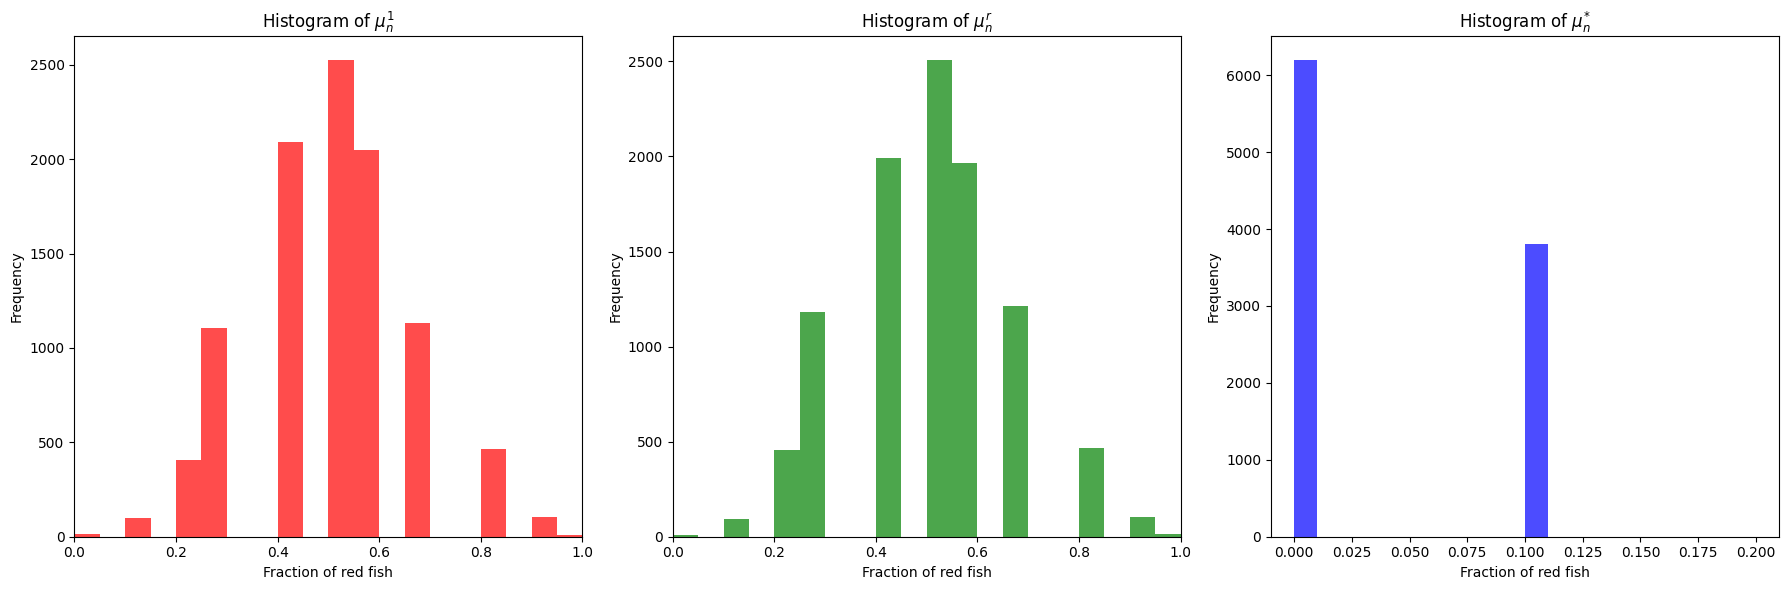

In [28]:
nb_bins = 20

x_min = 0.0
x_max = 1.0

# Plot the histograms
plt.figure(figsize=(18, 6))

# Histogram for f1
plt.subplot(1, 3, 1)
plt.hist(mu_f1, bins=nb_bins, color='red', alpha=0.7)
plt.title("Histogram of $μ_n^{1}$")
plt.xlabel("Fraction of red fish")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)  # Set the x-axis limits

# Histogram for fr
plt.subplot(1, 3, 2)
plt.hist(mu_fr, bins=nb_bins, color='green', alpha=0.7)
plt.title("Histogram of $μ_n^{r}$")
plt.xlabel("Fraction of red fish")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)  # Set the x-axis limits

# Histogram for f*
plt.subplot(1, 3, 3)
plt.hist(mu_fstar, bins=nb_bins, color='blue', alpha=0.7)
plt.title("Histogram of $μ_n^{*}$")
plt.xlabel("Fraction of red fish")
plt.ylabel("Frequency")
#plt.xlim(x_min, x_max)  # Set the x-axis limits

plt.tight_layout()
plt.show()

## (b)

In [29]:
# Function to calculate the empirical probability
def empirical_prob(mu_array, mu, epsilon):
    return np.mean(np.abs(mu_array - mu) >= epsilon)

In [30]:
# Values of epsilon to test
epsilon_values = np.linspace(0, 1, 1000)

# Calculate empirical probabilities for each strategy
emp_probs_f1 = [empirical_prob(mu_f1, mu, eps) for eps in epsilon_values]
emp_probs_fr = [empirical_prob(mu_fr, mu, eps) for eps in epsilon_values]
emp_probs_fstar = [empirical_prob(mu_fstar, mu, eps) for eps in epsilon_values]

# Calculate the Hoeffding bound for each epsilon
hoeffding_bound = [2 * np.exp(-2 * 10 * eps**2) for eps in epsilon_values]

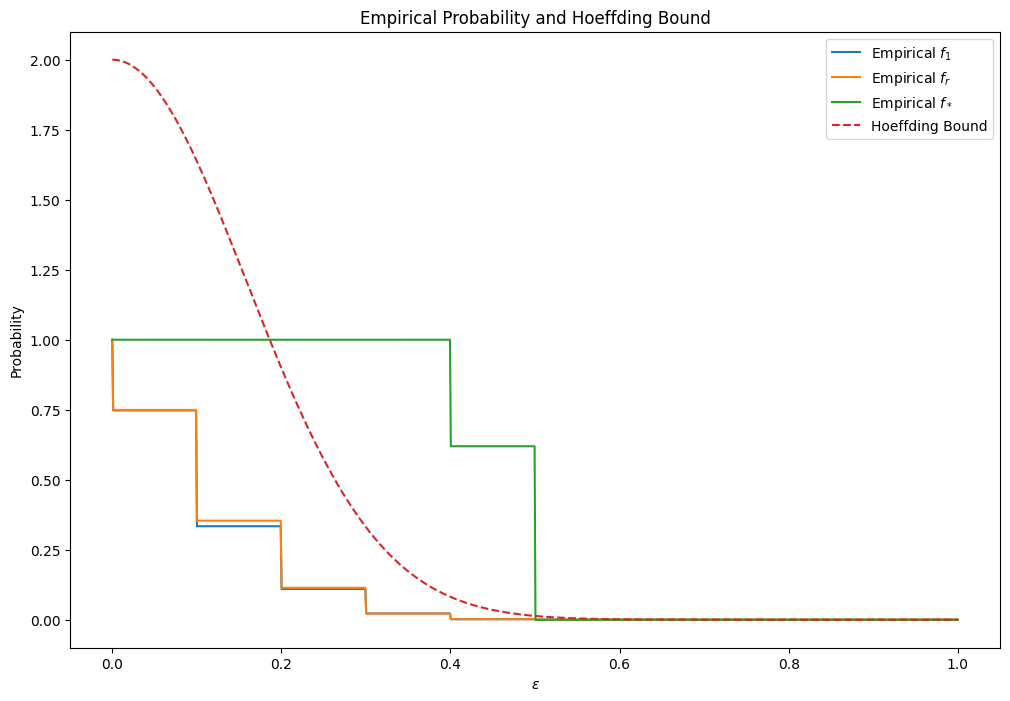

In [31]:
# Plot the estimates and the Hoeffding bound
plt.figure(figsize=(12, 8))

plt.plot(epsilon_values, emp_probs_f1, label="Empirical $f_1$")
plt.plot(epsilon_values, emp_probs_fr, label="Empirical $f_r$")
plt.plot(epsilon_values, emp_probs_fstar, label="Empirical $f_*$")
plt.plot(epsilon_values, hoeffding_bound, label="Hoeffding Bound", linestyle='--')

plt.title("Empirical Probability and Hoeffding Bound")
plt.xlabel("$\epsilon$")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Aufgabe 2
## a)

In [32]:
# Define the Bayes optimal classifier
def bayes_classifier(x):
    return 1 if 0.25 <= x <= 0.75 else 0

In [33]:
sample_size = int(1e5)
n = 100

S = [(np.random.uniform(0, 1), bayes_classifier(np.random.uniform(0, 1))) for _ in range(sample_size)]

indices = np.random.choice(range(sample_size), size=n, replace=False)
training_set = [S[i] for i in indices]

In [35]:
def learner_minimize_empirical_risk(S):
    S_sorted = sorted(S, key=lambda x: x[0])
    best_theta = 0
    best_error = float('inf')

    for i, (x, y) in enumerate(S_sorted):
        f_theta = lambda x_val: 0 if x_val < x else 1
        errors = sum(int(f_theta(x_val) != y_val) for x_val, y_val in S)

        if errors < best_error:
            best_error = errors
            best_theta = x

    return lambda x: 0 if x < best_theta else 1

In [36]:
def learner_random_threshold(S):
    x_i = np.random.choice([x for x, y in S])
    return lambda x: 0 if x < x_i else 1

In [38]:
h1 = learner_minimize_empirical_risk(training_set)
h2 = learner_random_threshold(training_set)

test_x = np.random.uniform(0, 1)
print(f"Hypothesis 1 prediction for {test_x:.4f}: {h1(test_x)}")
print(f"Hypothesis 2 prediction for {test_x:.4f}: {h2(test_x)}")

Hypothesis 1 prediction for 0.3717: 1
Hypothesis 2 prediction for 0.3717: 0
